In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
business = pd.read_json('business.json', lines=True)

In [3]:
business.shape

(192609, 14)

In [4]:
business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [5]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 14 columns):
address         192609 non-null object
attributes      163773 non-null object
business_id     192609 non-null object
categories      192127 non-null object
city            192609 non-null object
hours           147779 non-null object
is_open         192609 non-null int64
latitude        192609 non-null float64
longitude       192609 non-null float64
name            192609 non-null object
postal_code     192609 non-null object
review_count    192609 non-null int64
stars           192609 non-null float64
state           192609 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 20.6+ MB


In [6]:
business = business.drop(['address','attributes','hours','is_open','latitude','longitude','name','postal_code'],axis=1)

In [7]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 6 columns):
business_id     192609 non-null object
categories      192127 non-null object
city            192609 non-null object
review_count    192609 non-null int64
stars           192609 non-null float64
state           192609 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 8.8+ MB


In [8]:
print(business.categories[0])

Golf, Active Life


In [9]:
type(business.categories[0])

str

In [10]:
business.categories[0][0]

'G'

In [11]:
business['categories'] = business['categories'].str.split(pat = ', ?')

In [12]:
business['categories'].head()

0                                  [Golf, Active Life]
1    [Specialty Food, Restaurants, Dim Sum, Importe...
2                  [Sushi Bars, Restaurants, Japanese]
3                      [Insurance, Financial Services]
4    [Plumbing, Shopping, Local Services, Home Serv...
Name: categories, dtype: object

In [13]:
category_counts = business['categories'].apply(pd.Series).stack().reset_index(drop=True)
category_counts =  category_counts.value_counts().head()

In [14]:
category_counts

Restaurants      59371
Shopping         31878
Food             29989
Home Services    19729
Beauty & Spas    19370
dtype: int64

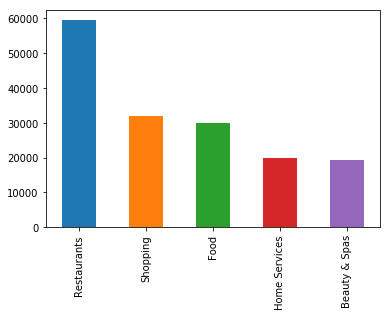

In [15]:
category_counts.plot(kind='bar')

In [16]:
pd.isna(business['categories']).sum()

482

In [21]:
a = business.loc[pd.isna(business['categories'])]
a.head()

,business_id,categories,city,review_count,stars,state
265,xOR85RicYj642O3_iJ7hgg,None,Scottsdale,3,3.5,AZ
597,tWvep1usNNI3NYkoRbSb7g,None,Airdrie,3,1.0,AB
1020,llG2YxnevtFhW7LVa4QJXQ,None,Pittsburgh,5,2.0,PA
1332,zi2CV7isWyGRxVXJxdDQXg,None,Charlotte,3,1.5,NC
1770,oyPZZX2fQYpSBHk25tL26A,None,Etobicoke,6,4.5,ON


In [23]:
b = business.loc[~pd.isna(business['categories'])]
b.head()

,business_id,categories,city,review_count,stars,state
0,1SWheh84yJXfytovILXOAQ,"[Golf, Active Life]",Phoenix,5,3.0,AZ
1,QXAEGFB4oINsVuTFxEYKFQ,"[Specialty Food, Restaurants, Dim Sum, Importe...",Mississauga,128,2.5,ON
2,gnKjwL_1w79qoiV3IC_xQQ,"[Sushi Bars, Restaurants, Japanese]",Charlotte,170,4.0,NC
3,xvX2CttrVhyG2z1dFg_0xw,"[Insurance, Financial Services]",Goodyear,3,5.0,AZ
4,HhyxOkGAM07SRYtlQ4wMFQ,"[Plumbing, Shopping, Local Services, Home Serv...",Charlotte,4,4.0,NC


In [24]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192127 entries, 0 to 192608
Data columns (total 6 columns):
business_id     192127 non-null object
categories      192127 non-null object
city            192127 non-null object
review_count    192127 non-null int64
stars           192127 non-null float64
state           192127 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 10.3+ MB


In [28]:
b = b.loc[b['categories'].apply(lambda x: 'Restaurants' in x), :]

In [29]:
b.shape

(59371, 6)

In [30]:
restaurant_category_counts = b['categories'].apply(pd.Series).stack().reset_index(drop=True).value_counts().head(20)

In [31]:
restaurant_category_counts.head()

Restaurants    59371
Food           14800
Nightlife       8562
Bars            8182
Sandwiches      7332
dtype: int64

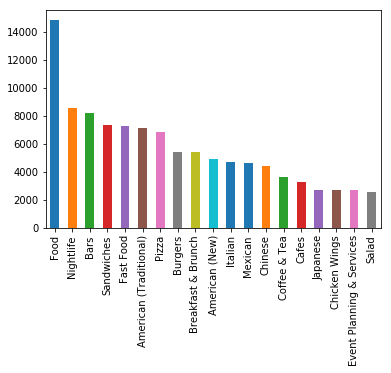

In [32]:
restaurant_category_counts[1:].plot(kind='bar')

In [35]:
pizza = b.loc[b['categories'].apply(lambda x: 'Pizza' in x), :]

In [36]:
pizza.shape

(6804, 6)

In [37]:
pizza.head()

,business_id,categories,city,review_count,stars,state
13,fweCYi8FmbJXHCqLnwuk8w,"[Italian, Restaurants, Pizza, Chicken Wings]",Mentor-on-the-Lake,16,4.0,OH
135,bJP4l_BGq2CudEu0m-wNjg,"[Restaurants, Pizza, Italian, American (New)]",Las Vegas,3,2.0,NV
149,WlArCYe6xCzOe5u2Lt1how,"[Pizza, Caterers, Restaurants, Event Planning ...",Etobicoke,5,3.0,ON
163,jwHtNvHBPafiAwM92jM8yA,"[Restaurants, Pizza]",Whitchurch-Stouffville,3,4.0,ON
173,v7ZFEEqJBg_r8NCwHRP_2A,"[Food, Pizza, Wine Bars, Bars, Restaurants, Ni...",Las Vegas,3,4.5,NV


In [59]:
italian_pizza= b.loc[b['categories'].apply(lambda x: 'Italian'  in x or 'Pizza'in x ), :]

In [60]:
italian_pizza.head()

,business_id,categories,city,review_count,stars,state
13,fweCYi8FmbJXHCqLnwuk8w,"[Italian, Restaurants, Pizza, Chicken Wings]",Mentor-on-the-Lake,16,4.0,OH
135,bJP4l_BGq2CudEu0m-wNjg,"[Restaurants, Pizza, Italian, American (New)]",Las Vegas,3,2.0,NV
149,WlArCYe6xCzOe5u2Lt1how,"[Pizza, Caterers, Restaurants, Event Planning ...",Etobicoke,5,3.0,ON
163,jwHtNvHBPafiAwM92jM8yA,"[Restaurants, Pizza]",Whitchurch-Stouffville,3,4.0,ON
173,v7ZFEEqJBg_r8NCwHRP_2A,"[Food, Pizza, Wine Bars, Bars, Restaurants, Ni...",Las Vegas,3,4.5,NV


In [61]:
italian_pizza.shape

(6804, 6)

In [63]:
italian_pizza.to_csv('italian_pizza.csv',index=False,columns=['business_id','review_count','stars','state'])